<a href="https://colab.research.google.com/github/Evan-Barry/FYP_GAN_Prototype/blob/main/Brick.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Imports**

In [5]:
# Imports

import numpy as np
from numpy import random
from matplotlib import pyplot as plt
%matplotlib inline
from PIL import Image

**Plotting Function**

In [6]:
# Drawing function

def view_samples(samples, m, n):
    fig, axes = plt.subplots(figsize=(10, 10), nrows=m, ncols=n, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples):
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(1-img.reshape((10,10)), cmap='Greys_r')  
    return fig, axes

**Examples of Mounatains**

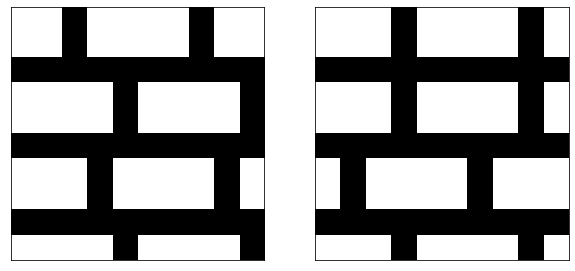

In [11]:
# Examples of mountains
faces = [np.array([0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,0,1]),
         np.array([0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,1,1,1,1,1,1,1,1,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,0,0,0,0,1,0])]
    
_ = view_samples(faces, 1, 2)

**Examples of Noise**

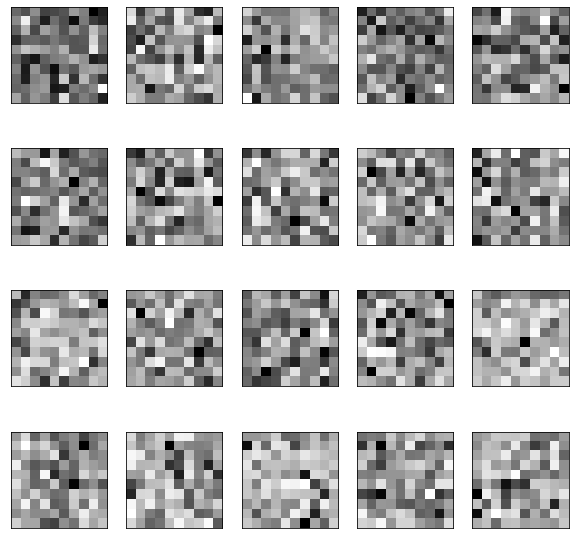

In [14]:
# Examples of noisy images
noise = [np.random.randn(10,10) for i in range(20)]
def generate_random_image():
    return [np.random.random(), np.random.random(), np.random.random(), np.random.random()]

_ = view_samples(noise, 4,5)

**Building the Neural Networks

In [15]:
# The sigmoid activation function
def sigmoid(x):
  return np.exp(x)/(1.0+np.exp(x))

**The Discriminator**

In [20]:
class Discriminator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(100)])
    self.bias = np.random.normal()

  def forward(self, x):
    return sigmoid(np.dot(x, self.weights) + self.bias)

  def error_from_image(self, image):
    prediction = self.forward(image)
    return -np.log(prediction)

  def derivative_from_image(self, image):
    prediction = self.forward(image)
    derivatives_weights = -image * (1-prediction)
    derivatives_bias = -(1-prediction)
    return derivatives_weights, derivatives_bias

  def update_from_image(self, x):
    ders = self.derivative_from_image(x)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

  def error_from_noise(self, noise):
    prediction = self.forward(noise)
    return -np.log(1-prediction)

  def derivative_from_noise(self, noise):
    prediction = self.forward(noise)
    derivatives_weights = noise * prediction
    derivatives_bias = prediction
    return derivatives_weights, derivatives_bias

  def update_from_noise(self, noise):
    ders = self.derivative_from_noise(noise)
    self.weights -= learning_rate * ders[0]
    self.bias -= learning_rate * ders[1]

**The Generator**

In [21]:
class Generator():
  def __init__(self):
    self.weights = np.array([np.random.normal() for i in range(100)])
    self.biases = np.array([np.random.normal() for i in range(100)])

  def forward(self, z):
    return sigmoid(z * self.weights + self.biases)

  def error(self, z, discriminator):
    x = self.forward(z)
    y = discriminator.forward(x)
    return -np.log(y)

  def derivatives(self, z, discriminator):
    discriminator_weights = discriminator.weights
    discriminator_bias = discriminator.bias
    x = self.forward(z)
    y = discriminator.forward(x)
    factor = -(1-y) * discriminator_weights * x * (1-x)
    derivative_weights = factor * z
    derivative_bias = factor
    return derivative_weights, derivative_bias

  def update(self, z, discriminator):
    error_before = self.error(z, discriminator)
    ders = self.derivatives(z, discriminator)
    self.weights -= learning_rate * ders[0]
    self.biases -= learning_rate * ders[1]
    error_after = self.error(z, discriminator)

**Training**

In [36]:
# Set Random Seed
np.random.seed(100)

learning_rate = 0.01
epochs = 100000

# The GAN
D = Discriminator()
G = Generator()

errors_discriminator = []
errors_generator = []

for epoch in range(epochs):
  for face in faces:
    D.update_from_image(face)

    z = random.rand()

    errors_discriminator.append(sum(D.error_from_image(face) + D.error_from_noise(z)))

    errors_generator.append(G.error(z, D))

    noise = G.forward(z)

    D.update_from_noise(noise)

    G.update(z,D)

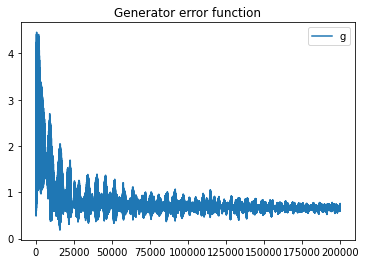

Text(0.5, 1.0, 'Discriminaotr error function')

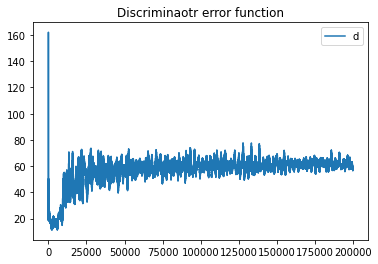

In [37]:
import matplotlib.pyplot as plt
plt.plot(errors_generator)
plt.title("Generator error function")
plt.legend("gen")
plt.show()
plt.plot(errors_discriminator)
plt.legend('disc')
plt.title("Discriminaotr error function")

**Generated Images**

[5.15580750e-05 2.04756042e-05 1.34411938e-01 4.86888680e-01
 5.02474332e-05 6.19333824e-05 1.24492381e-04 1.65288308e-01
 6.31342264e-01 4.70934791e-05 9.51181135e-05 6.65529287e-05
 6.38090101e-01 2.01444989e-01 5.95623376e-05 1.21762873e-04
 1.06674036e-04 1.80024857e-01 5.65818480e-01 4.95252013e-05
 9.99514686e-01 9.98965586e-01 9.98903302e-01 9.99354687e-01
 9.99155518e-01 9.99624013e-01 9.99326937e-01 9.99538163e-01
 9.99602224e-01 9.99125269e-01 5.83866248e-05 1.15468887e-04
 1.34377139e-04 4.72742733e-01 5.01271960e-01 3.56466284e-05
 6.65032463e-05 1.32515532e-04 1.59410622e-01 1.76071201e-01
 4.74086059e-05 1.19861898e-04 7.98450370e-05 2.21790546e-01
 3.39289813e-01 4.33021966e-05 1.30505905e-04 6.04299450e-05
 5.35546200e-01 8.66465579e-01 9.99188078e-01 9.99205338e-01
 9.99400480e-01 9.99294426e-01 9.98701186e-01 9.99582312e-01
 9.99316421e-01 9.99623111e-01 9.98656157e-01 9.99314461e-01
 1.00844875e-04 5.52860354e-01 5.04724779e-05 7.35427079e-01
 3.28405170e-05 8.509814

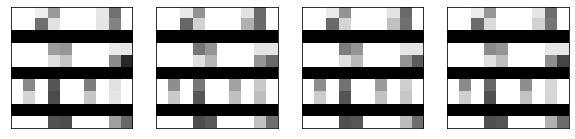

In [38]:
generated_images = []
for i in range(4):
  z = random.random()
  generated_image = G.forward(z)
  generated_images.append(generated_image)
_ = view_samples(generated_images, 1, 4)
for i in generated_images:
  print(i)

**Studying the weights and biases of the Generator and Discriminator**

In [31]:
print("Generator Weights" , G.weights)
print("Generator Biases" , G.biases)

Generator Weights [-3.05168584 -4.67101421 -0.40400463 -0.18126733 -3.24729258 -2.89361018
 -2.05900654 -0.40737167 -0.23475335 -3.5121472  -2.39412421 -2.95685947
 -0.22993816 -0.79385383 -3.15113744 -1.74698936 -2.10945286 -2.08008087
 -0.65191854 -3.34672432  2.4873536   1.06208502  1.26473245  2.07606367
  1.54218283  2.87586458  2.06427942  2.38858874  2.89295171  1.42529776
 -3.2303146  -1.68137026 -1.7309628  -0.98107551 -0.01224789 -3.82455075
 -2.80197589 -1.5156605  -0.38684176 -0.08746075 -3.31174002 -1.92973176
 -2.74192928  0.10301468 -0.4444785  -3.1823951  -1.75940419 -2.89510701
  0.2143718   2.15028498  1.89496335  1.98451859  2.25186729  1.94010731
  1.05606376  2.61773394  1.94444278  2.76158921  1.12055834  2.01809327
 -2.36156398  0.21241639 -3.44850042  1.06355187 -3.67356638 -2.41336181
  0.91085684 -3.73080071 -1.01418663 -2.42472865 -4.11322    -0.39098733
 -2.83271936  0.33712725 -1.78693784 -1.62609903 -0.19565648 -2.75297463
 -1.67820694 -3.02191604  1.04744

In [32]:
print("Discriminator Weights" , D.weights)
print("Discriminator Biases" , D.bias)

Discriminator Weights [-2.91370004 -2.5726346  -0.54231362 -0.63403655 -2.74282854 -2.78376483
 -2.52078317  1.35447915  0.45144938 -2.55247718 -2.57194078 -2.58979836
 -0.01565281  1.20753695 -2.59876773 -2.8196961  -2.66548231 -0.00858314
 -0.36990611 -2.61016531  0.92606112  0.69270416  0.39418233  0.51105038
  0.68128866  0.38769648  0.364496    0.38681888  0.45090891  0.59286658
 -2.53349094 -3.00282815 -2.63858949  0.49504621 -0.07682385 -2.62085032
 -2.77291891 -2.88590553  0.39137705 -0.87797594 -2.74588165 -2.64277734
 -2.52577126 -1.17282465  1.16423283 -3.1265984  -2.65790048 -2.82870004
 -1.28877537 -0.20181774  0.64842515  0.61770568  0.58428604  0.50705966
  0.37733995  0.20386464  0.56231768  0.38925086  0.53904948  0.56140052
 -2.49470536 -0.34466443 -2.54236902  1.59550411 -2.97703738 -2.73642655
  0.11395156 -2.62384101 -1.19405892 -2.96919013 -3.2072768  -0.53738383
 -2.50958391 -0.37295815 -3.37061535 -2.46497409  1.14231474 -2.79499797
  0.0243718  -2.799172    0.2